# IMC Round 2

## Manual Trading Round

Example: Analyzing a sample distribution


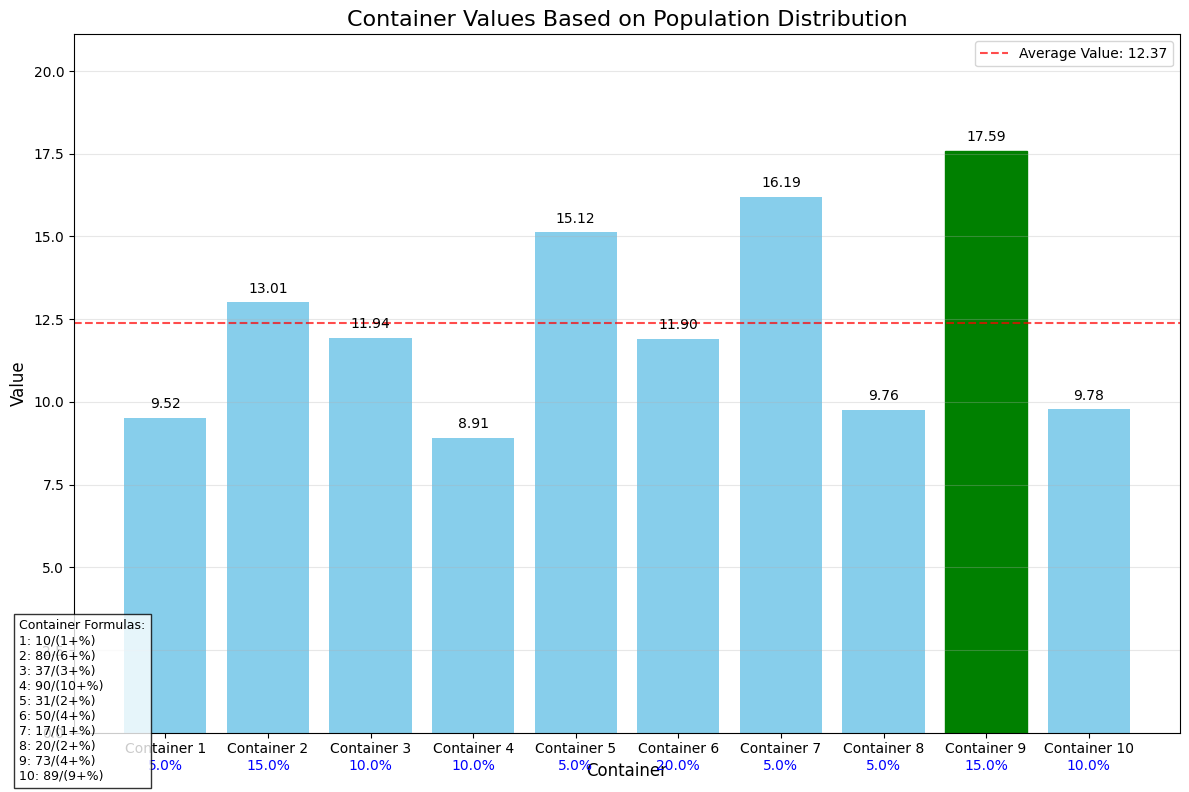


Container Ranking by Value:
--------------------------------------------------
Rank  Container   Value     Population %
--------------------------------------------------
1     Container 9 17.59     15.0        
2     Container 7 16.19     5.0         
3     Container 5 15.12     5.0         
4     Container 2 13.01     15.0        
5     Container 3 11.94     10.0        
6     Container 6 11.90     20.0        
7     Container 109.78      10.0        
8     Container 8 9.76      5.0         
9     Container 1 9.52      5.0         
10    Container 4 8.91      10.0        


In [3]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_container_values(percentages):
    """
    Calculate the value of each container based on the percentage of population.
    
    Args:
        percentages: List of percentages (0-100) for each container
    
    Returns:
        List of calculated values for each container
    """
    # Container formulas (numerator / (denominator + % population))
    container_formulas = [
        (10, 1),  # Container 1: 10 / (1 + % population)
        (80, 6),  # Container 2: 80 / (6 + % population)
        (37, 3),  # Container 3: 37 / (3 + % population)
        (90, 10), # Container 4: 90 / (10 + % population)
        (31, 2),  # Container 5: 31 / (2 + % population)
        (50, 4),  # Container 6: 50 / (4 + % population)
        (17, 1),  # Container 7: 17 / (1 + % population)
        (20, 2),  # Container 8: 20 / (2 + % population)
        (73, 4),  # Container 9: 73 / (4 + % population)
        (89, 9),  # Container 10: 89 / (9 + % population)
    ]
    
    # Calculate values based on formulas
    values = [num / (denom + (p/100)) for (num, denom), p in zip(container_formulas, percentages)]
    
    return values

def plot_container_values(percentages):
    """
    Plot the values of containers based on given percentages.
    
    Args:
        percentages: List of percentages for each container
    """
    # Ensure percentages sum to 100
    if abs(sum(percentages) - 100) > 0.01:
        print("Warning: Percentages don't sum to 100%. Normalizing values...")
        total = sum(percentages)
        percentages = [p / total for p in percentages]
    
    values = calculate_container_values(percentages)
    container_names = [f"Container {i+1}" for i in range(10)]
    
    # Create figure and axis
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Create bar chart
    bars = ax.bar(container_names, values, color='skyblue')
    
    # Highlight the best container
    best_idx = np.argmax(values)
    bars[best_idx].set_color('green')
    
    # Add value labels above the bars
    for bar, value in zip(bars, values):
        ax.text(
            bar.get_x() + bar.get_width()/2,
            bar.get_height() + 0.2,
            f"{value:.2f}",
            ha='center', va='bottom'
        )
    
    # Add a line showing the average value
    avg_value = np.mean(values)
    ax.axhline(y=avg_value, color='r', linestyle='--', alpha=0.7, 
               label=f'Average Value: {avg_value:.2f}')
    
    # Add percentage labels below the bars
    for i, (bar, pct) in enumerate(zip(bars, percentages)):
        ax.text(
            bar.get_x() + bar.get_width()/2,
            -0.8,
            f"{pct:.1f}%",
            ha='center', va='top',
            color='blue'
        )
    
    # Customize plot
    ax.set_title('Container Values Based on Population Distribution', fontsize=16)
    ax.set_ylabel('Value', fontsize=12)
    ax.set_xlabel('Container', fontsize=12)
    ax.set_ylim(0, max(values) * 1.2)  # Add some space for labels
    ax.grid(axis='y', alpha=0.3)
    ax.legend()
    
    # Add annotation about formulas
    formula_text = "Container Formulas:\n"
    formulas = [
        "1: 10/(1+%)", "2: 80/(6+%)", "3: 37/(3+%)", "4: 90/(10+%)", "5: 31/(2+%)",
        "6: 50/(4+%)", "7: 17/(1+%)", "8: 20/(2+%)", "9: 73/(4+%)", "10: 89/(9+%)"
    ]
    formula_text += "\n".join(formulas)
    
    fig.text(0.02, 0.02, formula_text, fontsize=9, 
             bbox=dict(facecolor='white', alpha=0.8))
    
    plt.tight_layout()
    plt.show()
    
    # Print ranking of containers by value
    ranking = sorted(zip(container_names, values, percentages), key=lambda x: x[1], reverse=True)
    print("\nContainer Ranking by Value:")
    print("-" * 50)
    print(f"{'Rank':<6}{'Container':<12}{'Value':<10}{'Population %':<12}")
    print("-" * 50)
    for i, (name, value, pct) in enumerate(ranking):
        print(f"{i+1:<6}{name:<12}{value:<10.2f}{pct:<12.1f}")
    
    return values, ranking

def analyze_optimal_choices():
    """
    Analyze each container to find its optimal value at different population percentages.
    """
    # Create a figure with 2 rows and 5 columns of subplots
    fig, axes = plt.subplots(2, 5, figsize=(15, 8))
    axes = axes.flatten()
    
    # Container formulas
    container_formulas = [
        (10, 1), (80, 6), (37, 3), (90, 10), (31, 2),
        (50, 4), (17, 1), (20, 2), (73, 4), (89, 9)
    ]
    
    best_values = []
    
    # For each container, plot its value as a function of population percentage
    for i, (num, denom) in enumerate(container_formulas):
        # Calculate values for different percentages
        percentages = np.linspace(0.1, 100, 1000)
        values = [num / (denom + (p/100)) for p in percentages]
        
        # Plot values
        axes[i].plot(percentages, values)
        
        # Find percentage that maximizes value
        max_idx = np.argmax(values)
        max_percentage = percentages[max_idx]
        max_value = values[max_idx]
        
        # Mark the maximum point
        axes[i].scatter([max_percentage], [max_value], color='red')
        axes[i].text(max_percentage, max_value * 1.05, 
                    f"{max_percentage:.1f}%, {max_value:.2f}", 
                    ha='center')
        
        best_values.append((i+1, max_percentage, max_value))
        
        # Configure subplot
        axes[i].set_title(f"Container {i+1}: {num}/{denom}+%")
        axes[i].set_xlabel("Population %")
        axes[i].set_ylabel("Value")
        axes[i].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Print best values
    print("\nOptimal Values for Each Container:")
    print("-" * 60)
    print(f"{'Container':<12}{'Best at %':<12}{'Maximum Value':<15}")
    print("-" * 60)
    for container, percentage, value in sorted(best_values, key=lambda x: x[2], reverse=True):
        print(f"Container {container:<3}{percentage:<12.1f}{value:<15.2f}")

def find_nash_equilibrium(max_iterations=100, tolerance=0.01):
    """
    Find approximate Nash equilibrium where all containers have equal value.
    Uses an iterative approach where population flows from lower to higher value containers.
    """
    # Start with equal distribution
    percentages = [10] * 10
    
    # Track convergence
    values_history = []
    
    for iteration in range(max_iterations):
        values = calculate_container_values(percentages)
        values_history.append(values)
        
        # Check if values are approximately equal
        value_range = max(values) - min(values)
        if value_range < tolerance:
            print(f"Converged after {iteration+1} iterations!")
            break
            
        # Adjust percentages based on values
        avg_value = np.mean(values)
        adjustments = [(v - avg_value) for v in values]
        
        # Normalize adjustments to keep total at 100%
        adjustment_scale = 0.2  # Smaller values make convergence more stable but slower
        percentages = [max(0.1, p - a * adjustment_scale) for p, a in zip(percentages, adjustments)]
        
        # Normalize to ensure percentages sum to 100
        total = sum(percentages)
        percentages = [p * 100 / total for p in percentages]
    
    # Plot convergence
    if len(values_history) > 1:
        plt.figure(figsize=(10, 6))
        for i in range(10):
            container_values = [values[i] for values in values_history]
            plt.plot(container_values, label=f"Container {i+1}")
        
        plt.title("Convergence to Nash Equilibrium")
        plt.xlabel("Iteration")
        plt.ylabel("Container Value")
        plt.grid(True, alpha=0.3)
        plt.legend()
        plt.tight_layout()
        plt.show()
    
    # Final calculation and visualization
    values = calculate_container_values(percentages)
    
    # Plot final distribution
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Plot percentages
    bars1 = ax1.bar(range(1, 11), percentages)
    ax1.set_title("Nash Equilibrium - Population Distribution")
    ax1.set_xlabel("Container")
    ax1.set_ylabel("Population %")
    ax1.set_xticks(range(1, 11))
    
    # Add percentage labels
    for bar, p in zip(bars1, percentages):
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                f"{p:.1f}%", ha='center')
    
    # Plot values
    bars2 = ax2.bar(range(1, 11), values)
    ax2.set_title("Nash Equilibrium - Container Values")
    ax2.set_xlabel("Container")
    ax2.set_ylabel("Value")
    ax2.set_xticks(range(1, 11))
    
    # Add value labels
    for bar, v in zip(bars2, values):
        ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
                f"{v:.2f}", ha='center')
    
    # Add horizontal line at average value
    avg_value = np.mean(values)
    ax2.axhline(y=avg_value, color='r', linestyle='--', 
                label=f"Average: {avg_value:.2f}")
    ax2.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Print results
    print("\nNash Equilibrium Distribution:")
    print("-" * 50)
    print(f"{'Container':<12}{'Population %':<15}{'Value':<10}")
    print("-" * 50)
    for i, (p, v) in enumerate(zip(percentages, values)):
        print(f"Container {i+1:<3}{p:<15.1f}{v:<10.2f}")
    
    return percentages, values

def vary_single_container(container_index, base_percentages=None):
    """
    Analyze how varying a single container's population affects its value.
    
    Args:
        container_index: Index of container to vary (0-9)
        base_percentages: Starting distribution (defaults to equal distribution)
    """
    if base_percentages is None:
        base_percentages = [10] * 10
    
    # Container formulas
    container_formulas = [
        (10, 1), (80, 6), (37, 3), (90, 10), (31, 2),
        (50, 4), (17, 1), (20, 2), (73, 4), (89, 9)
    ]
    num, denom = container_formulas[container_index]
    
    # Create range of percentages to try
    test_percentages = np.linspace(0.1, 100, 1000)
    values = []
    
    for p in test_percentages:
        # Create adjusted distribution
        new_percentages = base_percentages.copy()
        new_percentages[container_index] = p
        
        # Adjust other containers proportionally to maintain sum of 100%
        remaining = 100 - p
        other_total = sum(new_percentages) - p
        if other_total > 0:  # Avoid division by zero
            for i in range(len(new_percentages)):
                if i != container_index:
                    new_percentages[i] = new_percentages[i] * remaining / other_total
        
        # Calculate value
        container_values = calculate_container_values(new_percentages)
        values.append(container_values[container_index])
    
    # Find optimal percentage
    max_idx = np.argmax(values)
    max_percentage = test_percentages[max_idx]
    max_value = values[max_idx]
    
    # Current value
    current_values = calculate_container_values(base_percentages)
    current_value = current_values[container_index]
    
    # Plot results
    plt.figure(figsize=(10, 6))
    plt.plot(test_percentages, values)
    plt.scatter([max_percentage], [max_value], color='green', s=100,
                label=f'Optimal: {max_percentage:.1f}% → {max_value:.2f}')
    plt.scatter([base_percentages[container_index]], [current_value], color='red', s=100,
                label=f'Current: {base_percentages[container_index]:.1f}% → {current_value:.2f}')
    
    plt.title(f'Value of Container {container_index+1} ({num}/{denom}+%) as Population Varies')
    plt.xlabel('Population Percentage')
    plt.ylabel('Value')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    return max_percentage, max_value

# Main simulation interface
def run_simulation():
    print("\n===== CONTAINER VALUE SIMULATION =====\n")
    print("This simulation analyzes how container values change based on population distribution.")
    
    while True:
        print("\nOptions:")
        print("1. Analyze a specific population distribution")
        print("2. Find Nash equilibrium (equal value distribution)")
        print("3. Analyze optimal values for each container")
        print("4. Analyze how varying a specific container affects its value")
        print("5. Quit")
        
        choice = input("\nEnter your choice (1-5): ")
        
        if choice == '1':
            print("\nEnter population percentages for each container (should sum to 100):")
            percentages = []
            for i in range(10):
                while True:
                    try:
                        p = float(input(f"Container {i+1}: "))
                        percentages.append(p)
                        break
                    except ValueError:
                        print("Invalid input. Please enter a number.")
            
            plot_container_values(percentages)
            
        elif choice == '2':
            print("\nFinding Nash equilibrium...")
            find_nash_equilibrium()
            
        elif choice == '3':
            print("\nAnalyzing optimal values for each container...")
            analyze_optimal_choices()
            
        elif choice == '4':
            container = int(input("\nWhich container do you want to analyze (1-10)? ")) - 1
            if 0 <= container <= 9:
                print("\nEnter current population percentages, or press Enter for equal distribution:")
                percentages = []
                use_equal = input("Use equal distribution (10% each)? (y/n): ").lower() == 'y'
                
                if use_equal:
                    percentages = [10] * 10
                else:
                    for i in range(10):
                        while True:
                            try:
                                p = float(input(f"Container {i+1}: "))
                                percentages.append(p)
                                break
                            except ValueError:
                                print("Invalid input. Please enter a number.")
                
                vary_single_container(container, percentages)
            else:
                print("Invalid container number. Please choose 1-10.")
                
        elif choice == '5':
            print("\nExiting simulation. Goodbye!")
            break
            
        else:
            print("Invalid choice. Please enter a number between 1 and 5.")

# Run the simulation
if __name__ == "__main__":
    # Example: analyze a specific distribution
    print("Example: Analyzing a sample distribution")
    sample_percentages = [5, 15, 10, 10, 5, 20, 5, 5, 15, 10]
    plot_container_values(sample_percentages)
    
    # Uncomment to run the interactive simulation
    # run_simulation()

## Simulation Comparing Top 4 Containers

Example: Equal distribution among containers


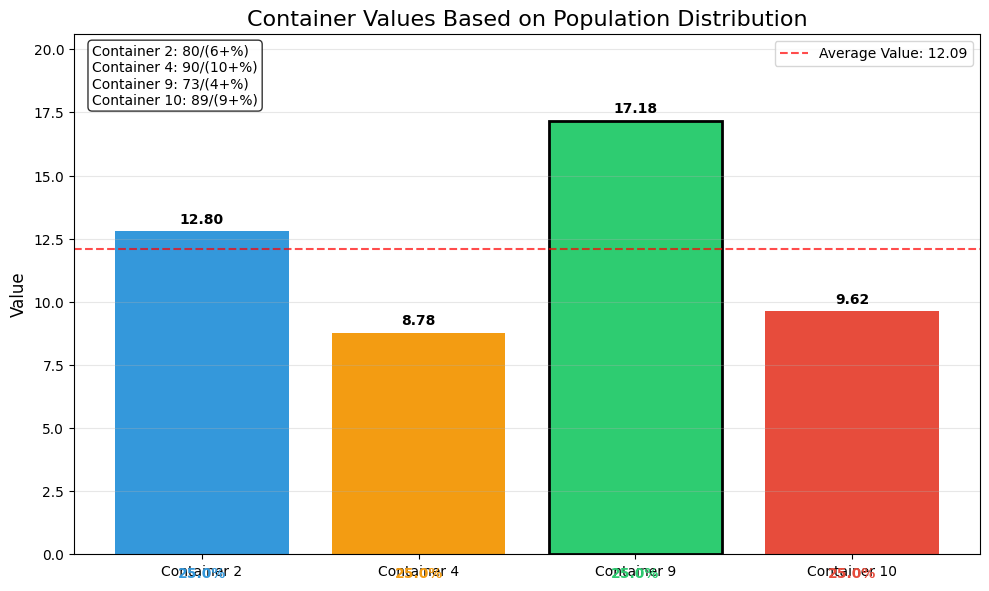


Container Ranking by Value:
--------------------------------------------------
Rank  Container   Value     Population %
--------------------------------------------------
1     Container 9 17.18     25.0        
2     Container 2 12.80     25.0        
3     Container 109.62      25.0        
4     Container 4 8.78      25.0        

Analyzing optimal values for each container...


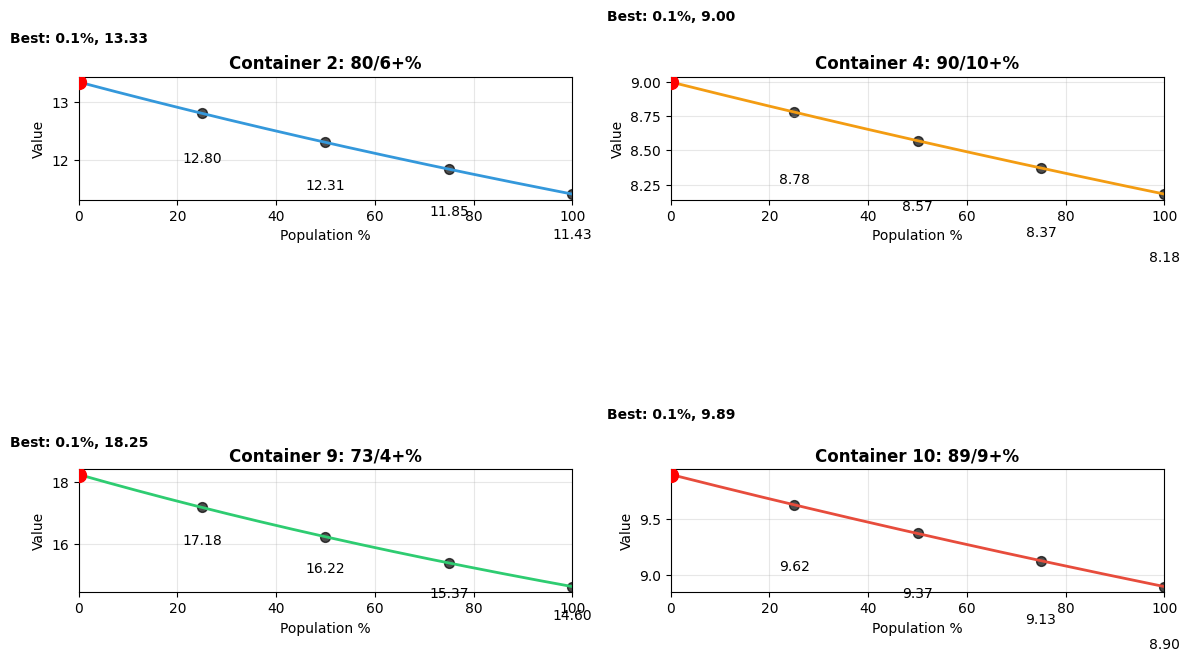


Optimal Values for Each Container:
------------------------------------------------------------
Container   Best at %   Maximum Value  
------------------------------------------------------------
Container 9 0.1         18.25          
Container 2 0.1         13.33          
Container 100.1         9.89           
Container 4 0.1         9.00           

Finding Nash equilibrium...


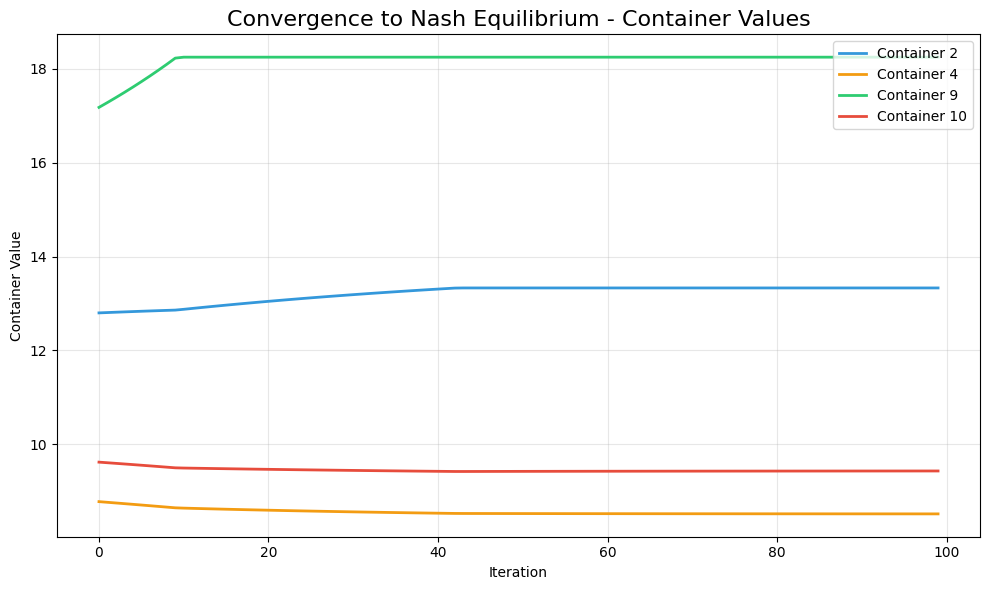

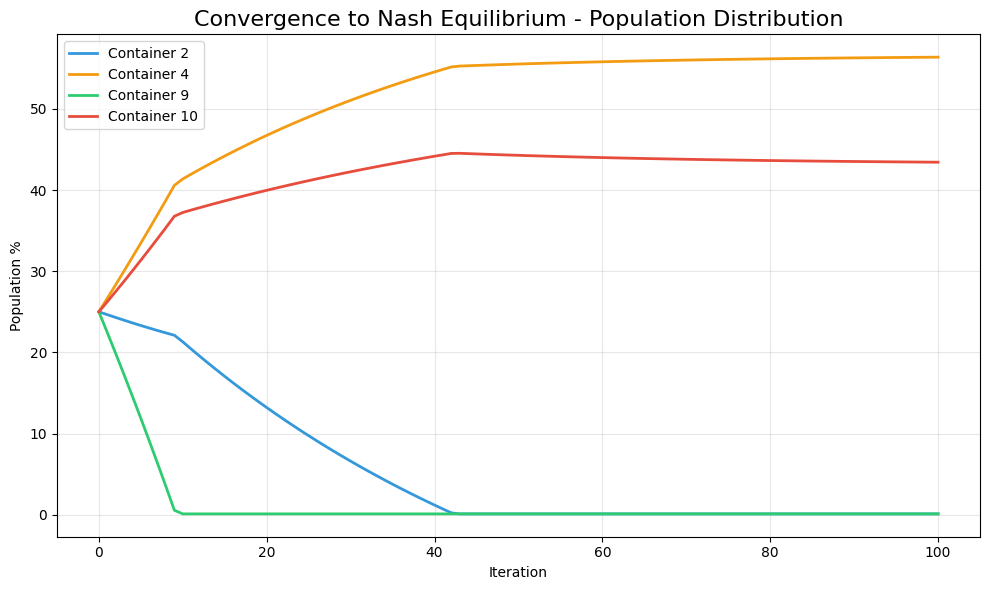

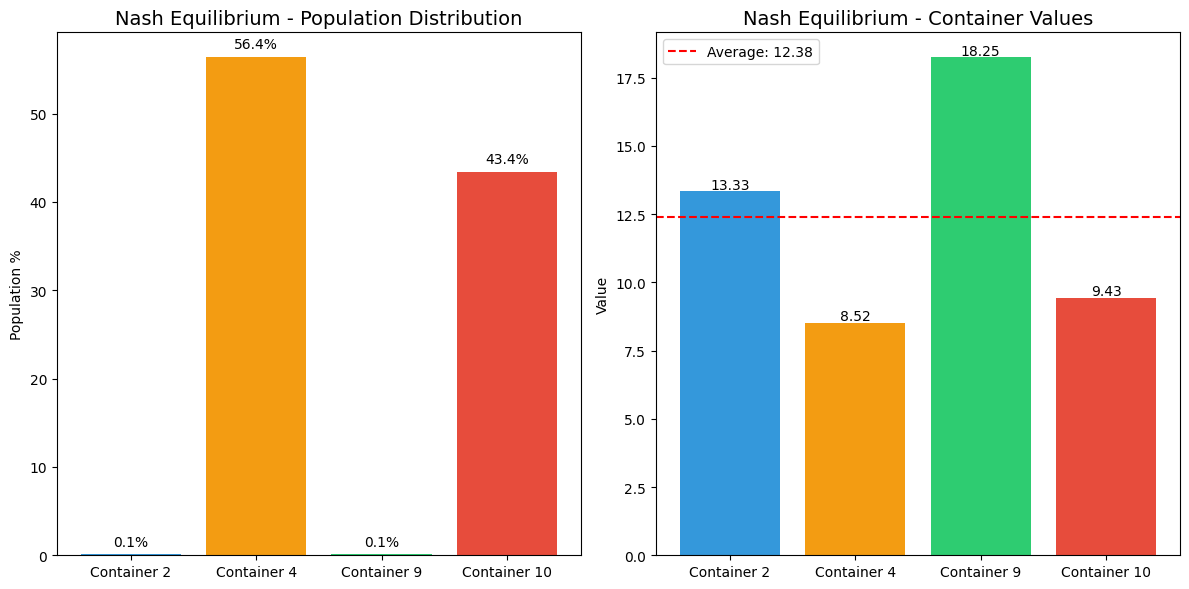


Nash Equilibrium Distribution:
--------------------------------------------------
Container   Population %   Value     
--------------------------------------------------
Container 2 0.1            13.33     
Container 4 56.4           8.52      
Container 9 0.1            18.25     
Container 1043.4           9.43      

Comparing 'all-in' strategies...


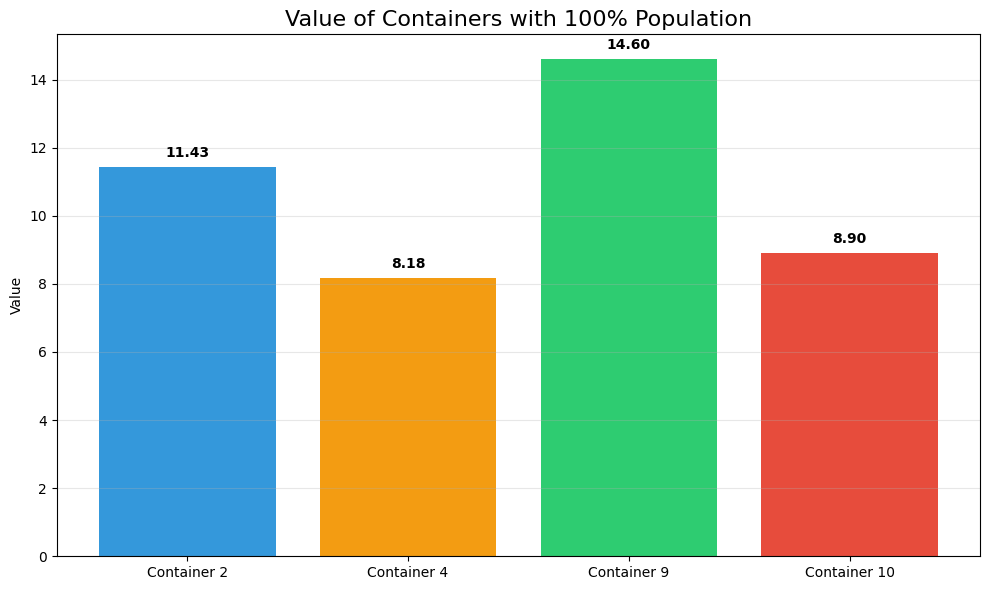


Ranking of Containers with 100% Population:
--------------------------------------------------
Rank  Container   Value     
--------------------------------------------------
1     Container 9 14.60     
2     Container 2 11.43     
3     Container 108.90      
4     Container 4 8.18      


In [4]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_container_values(percentages):
    """
    Calculate the value of each container based on the percentage of population.
    
    Args:
        percentages: List of percentages (0-100) for containers 2, 4, 9, 10
    
    Returns:
        List of calculated values for each container
    """
    # Container formulas (numerator / (denominator + % population))
    container_formulas = [
        (80, 6),   # Container 2: 80 / (6 + % population)
        (90, 10),  # Container 4: 90 / (10 + % population)
        (73, 4),   # Container 9: 73 / (4 + % population)
        (89, 9)    # Container 10: 89 / (9 + % population)
    ]
    
    # Calculate values based on formulas
    values = [num / (denom + (p/100)) for (num, denom), p in zip(container_formulas, percentages)]
    
    return values

def plot_container_values(percentages):
    """
    Plot the values of containers based on given percentages.
    
    Args:
        percentages: List of percentages for containers 2, 4, 9, 10
    """
    # Ensure percentages sum to 100
    if abs(sum(percentages) - 100) > 0.01:
        print("Warning: Percentages don't sum to 100%. Normalizing values...")
        total = sum(percentages)
        percentages = [p * 100 / total for p in percentages]
    
    values = calculate_container_values(percentages)
    container_names = ["Container 2", "Container 4", "Container 9", "Container 10"]
    
    # Create figure and axis
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Define colors for each container
    colors = ['#3498db', '#f39c12', '#2ecc71', '#e74c3c']
    
    # Create bar chart
    bars = ax.bar(container_names, values, color=colors)
    
    # Highlight the best container
    best_idx = np.argmax(values)
    bars[best_idx].set_edgecolor('black')
    bars[best_idx].set_linewidth(2)
    
    # Add value labels above the bars
    for bar, value in zip(bars, values):
        ax.text(
            bar.get_x() + bar.get_width()/2,
            bar.get_height() + 0.2,
            f"{value:.2f}",
            ha='center', va='bottom',
            fontweight='bold'
        )
    
    # Add a line showing the average value
    avg_value = np.mean(values)
    ax.axhline(y=avg_value, color='red', linestyle='--', alpha=0.7, 
               label=f'Average Value: {avg_value:.2f}')
    
    # Add percentage labels below the bars
    for i, (bar, pct) in enumerate(zip(bars, percentages)):
        ax.text(
            bar.get_x() + bar.get_width()/2,
            -0.5,
            f"{pct:.1f}%",
            ha='center', va='top',
            color=colors[i],
            fontweight='bold'
        )
    
    # Customize plot
    ax.set_title('Container Values Based on Population Distribution', fontsize=16)
    ax.set_ylabel('Value', fontsize=12)
    ax.set_ylim(0, max(values) * 1.2)  # Add some space for labels
    ax.grid(axis='y', alpha=0.3)
    ax.legend()
    
    # Add formulas as a legend
    formulas = [
        "Container 2: 80/(6+%)",
        "Container 4: 90/(10+%)", 
        "Container 9: 73/(4+%)",
        "Container 10: 89/(9+%)"
    ]
    formula_text = "\n".join(formulas)
    ax.text(0.02, 0.98, formula_text, transform=ax.transAxes, 
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    plt.tight_layout()
    plt.show()
    
    # Print ranking of containers by value
    ranking = sorted(zip(container_names, values, percentages), key=lambda x: x[1], reverse=True)
    print("\nContainer Ranking by Value:")
    print("-" * 50)
    print(f"{'Rank':<6}{'Container':<12}{'Value':<10}{'Population %':<12}")
    print("-" * 50)
    for i, (name, value, pct) in enumerate(ranking):
        print(f"{i+1:<6}{name:<12}{value:<10.2f}{pct:<12.1f}")
    
    return values, ranking

def analyze_optimal_distribution():
    """
    Analyze each container to find its optimal value at different population percentages.
    """
    # Create a figure with 2x2 subplots
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    axes = axes.flatten()
    
    # Container formulas
    container_formulas = [
        (80, 6),   # Container 2: 80 / (6 + % population)
        (90, 10),  # Container 4: 90 / (10 + % population)
        (73, 4),   # Container 9: 73 / (4 + % population)
        (89, 9)    # Container 10: 89 / (9 + % population)
    ]
    
    container_names = ["Container 2", "Container 4", "Container 9", "Container 10"]
    colors = ['#3498db', '#f39c12', '#2ecc71', '#e74c3c']
    
    best_values = []
    
    # For each container, plot its value as a function of population percentage
    for i, (num, denom) in enumerate(container_formulas):
        # Calculate values for different percentages
        percentages = np.linspace(0.1, 100, 1000)
        values = [num / (denom + (p/100)) for p in percentages]
        
        # Plot values
        axes[i].plot(percentages, values, color=colors[i], linewidth=2)
        
        # Find percentage that maximizes value
        max_idx = np.argmax(values)
        max_percentage = percentages[max_idx]
        max_value = values[max_idx]
        
        # Mark the maximum point
        axes[i].scatter([max_percentage], [max_value], color='red', s=100, zorder=5)
        axes[i].text(max_percentage, max_value * 1.05, 
                    f"Best: {max_percentage:.1f}%, {max_value:.2f}", 
                    ha='center', fontweight='bold')
        
        # Mark 25%, 50%, 75%, 100% points
        for p in [25, 50, 75, 100]:
            idx = np.abs(percentages - p).argmin()
            p_actual = percentages[idx]
            v = values[idx]
            axes[i].scatter([p_actual], [v], color='black', s=50, alpha=0.7)
            axes[i].text(p_actual, v * 0.95, f"{v:.2f}", ha='center', va='top')
        
        best_values.append((container_names[i], max_percentage, max_value))
        
        # Configure subplot
        axes[i].set_title(f"{container_names[i]}: {num}/{denom}+%", fontweight='bold')
        axes[i].set_xlabel("Population %")
        axes[i].set_ylabel("Value")
        axes[i].grid(True, alpha=0.3)
        axes[i].set_xlim(0, 100)
    
    plt.tight_layout()
    plt.show()
    
    # Print best values
    print("\nOptimal Values for Each Container:")
    print("-" * 60)
    print(f"{'Container':<12}{'Best at %':<12}{'Maximum Value':<15}")
    print("-" * 60)
    for container, percentage, value in sorted(best_values, key=lambda x: x[2], reverse=True):
        print(f"{container:<12}{percentage:<12.1f}{value:<15.2f}")

def find_nash_equilibrium(max_iterations=100, tolerance=0.01):
    """
    Find approximate Nash equilibrium where all containers have equal value.
    Uses an iterative approach where population flows from lower to higher value containers.
    """
    # Start with equal distribution
    percentages = [25, 25, 25, 25]
    
    # Track convergence
    values_history = []
    percentages_history = [percentages.copy()]
    
    for iteration in range(max_iterations):
        values = calculate_container_values(percentages)
        values_history.append(values)
        
        # Check if values are approximately equal
        value_range = max(values) - min(values)
        if value_range < tolerance:
            print(f"Converged after {iteration+1} iterations!")
            break
            
        # Adjust percentages based on values
        avg_value = np.mean(values)
        adjustments = [(v - avg_value) for v in values]
        
        # Normalize adjustments to keep total at 100%
        adjustment_scale = 0.5  # Smaller values make convergence more stable but slower
        percentages = [max(0.1, p - a * adjustment_scale) for p, a in zip(percentages, adjustments)]
        
        # Normalize to ensure percentages sum to 100
        total = sum(percentages)
        percentages = [p * 100 / total for p in percentages]
        
        percentages_history.append(percentages.copy())
    
    # Plot convergence of values
    plt.figure(figsize=(10, 6))
    container_names = ["Container 2", "Container 4", "Container 9", "Container 10"]
    colors = ['#3498db', '#f39c12', '#2ecc71', '#e74c3c']
    
    for i in range(4):
        container_values = [values[i] for values in values_history]
        plt.plot(container_values, label=container_names[i], color=colors[i], linewidth=2)
    
    plt.title("Convergence to Nash Equilibrium - Container Values", fontsize=16)
    plt.xlabel("Iteration")
    plt.ylabel("Container Value")
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # Plot convergence of percentages
    plt.figure(figsize=(10, 6))
    
    for i in range(4):
        container_percentages = [percentages[i] for percentages in percentages_history]
        plt.plot(container_percentages, label=container_names[i], color=colors[i], linewidth=2)
    
    plt.title("Convergence to Nash Equilibrium - Population Distribution", fontsize=16)
    plt.xlabel("Iteration")
    plt.ylabel("Population %")
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # Final calculation and visualization
    values = calculate_container_values(percentages)
    
    # Plot final distribution
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    
    # Plot percentages
    bars1 = ax1.bar(container_names, percentages, color=colors)
    ax1.set_title("Nash Equilibrium - Population Distribution", fontsize=14)
    ax1.set_ylabel("Population %")
    
    # Add percentage labels
    for bar, p in zip(bars1, percentages):
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                f"{p:.1f}%", ha='center')
    
    # Plot values
    bars2 = ax2.bar(container_names, values, color=colors)
    ax2.set_title("Nash Equilibrium - Container Values", fontsize=14)
    ax2.set_ylabel("Value")
    
    # Add value labels
    for bar, v in zip(bars2, values):
        ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
                f"{v:.2f}", ha='center')
    
    # Add horizontal line at average value
    avg_value = np.mean(values)
    ax2.axhline(y=avg_value, color='red', linestyle='--', 
                label=f"Average: {avg_value:.2f}")
    ax2.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Print results
    print("\nNash Equilibrium Distribution:")
    print("-" * 50)
    print(f"{'Container':<12}{'Population %':<15}{'Value':<10}")
    print("-" * 50)
    container_names = ["Container 2", "Container 4", "Container 9", "Container 10"]
    for name, p, v in zip(container_names, percentages, values):
        print(f"{name:<12}{p:<15.1f}{v:<10.2f}")
    
    return percentages, values

def create_heatmap():
    """
    Create a heatmap showing the value of Container 9 as other containers' percentages vary.
    Since we're dealing with 4 containers with percentages that must sum to 100%,
    we'll fix Container 10's percentage and vary Containers 2, 4 and 9.
    """
    # Container formulas
    container_9_formula = (73, 4)  # Container 9: 73 / (4 + % population)
    
    # Create percentage grid
    container_10_pct = 25  # Fix Container 10's percentage
    grid_size = 50
    container_2_pcts = np.linspace(0, 75, grid_size)
    container_4_pcts = np.linspace(0, 75, grid_size)
    
    # Initialize value grid
    value_grid = np.zeros((grid_size, grid_size))
    
    # Calculate values
    for i, p2 in enumerate(container_2_pcts):
        for j, p4 in enumerate(container_4_pcts):
            # Calculate Container 9's percentage (ensuring sum to 100%)
            p9 = 100 - p2 - p4 - container_10_pct
            
            # Skip invalid combinations
            if p9 < 0:
                value_grid[i, j] = np.nan
                continue
            
            # Calculate Container 9's value
            value = container_9_formula[0] / (container_9_formula[1] + p9/100)
            value_grid[i, j] = value
    
    # Create heatmap
    plt.figure(figsize=(10, 8))
    
    # Create mask for invalid values
    mask = np.isnan(value_grid)
    
    # Plot heatmap
    heatmap = plt.pcolormesh(container_4_pcts, container_2_pcts, value_grid, 
                            cmap='viridis', shading='auto')
    
    # Draw line showing valid combinations (container 2 + container 4 + container 10 = 100%)
    validity_line_x = np.linspace(0, 75, 100)
    validity_line_y = 75 - validity_line_x
    plt.plot(validity_line_x, validity_line_y, 'r--', linewidth=2, 
             label=f'Container 9 = 0%, Container 10 = {container_10_pct}%')
    
    # Add colorbar
    cbar = plt.colorbar(heatmap)
    cbar.set_label('Container 9 Value', rotation=270, labelpad=20)
    
    # Customize plot
    plt.title(f'Value of Container 9 with Container 10 fixed at {container_10_pct}%', fontsize=14)
    plt.xlabel('Container 4 Percentage')
    plt.ylabel('Container 2 Percentage')
    plt.grid(alpha=0.3)
    plt.legend()
    
    plt.tight_layout()
    plt.show()

def compare_all_in_strategies():
    """
    Compare strategies where 100% of population chooses one container.
    """
    # Container formulas
    container_formulas = [
        (80, 6),   # Container 2: 80 / (6 + % population)
        (90, 10),  # Container 4: 90 / (10 + % population)
        (73, 4),   # Container 9: 73 / (4 + % population)
        (89, 9)    # Container 10: 89 / (9 + % population)
    ]
    
    container_names = ["Container 2", "Container 4", "Container 9", "Container 10"]
    colors = ['#3498db', '#f39c12', '#2ecc71', '#e74c3c']
    
    # Calculate values for 100% in each container
    all_in_values = [num / (denom + 100/100) for num, denom in container_formulas]
    
    # Create bar chart
    plt.figure(figsize=(10, 6))
    bars = plt.bar(container_names, all_in_values, color=colors)
    
    # Add value labels
    for bar, value in zip(bars, all_in_values):
        plt.text(
            bar.get_x() + bar.get_width()/2,
            bar.get_height() + 0.2,
            f"{value:.2f}",
            ha='center', va='bottom',
            fontweight='bold'
        )
    
    # Customize plot
    plt.title('Value of Containers with 100% Population', fontsize=16)
    plt.ylabel('Value')
    plt.grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Print ranking
    print("\nRanking of Containers with 100% Population:")
    print("-" * 50)
    print(f"{'Rank':<6}{'Container':<12}{'Value':<10}")
    print("-" * 50)
    
    ranking = sorted(zip(container_names, all_in_values), key=lambda x: x[1], reverse=True)
    for i, (name, value) in enumerate(ranking):
        print(f"{i+1:<6}{name:<12}{value:<10.2f}")

def run_simulation():
    """
    Run an interactive simulation.
    """
    while True:
        print("\n===== CONTAINER SIMULATION (2, 4, 9, 10) =====")
        print("1. Analyze specific distribution")
        print("2. Find Nash equilibrium")
        print("3. Analyze optimal values for each container")
        print("4. Compare 'all-in' strategies (100% on one container)")
        print("5. Exit")
        
        choice = input("\nSelect an option (1-5): ")
        
        if choice == '1':
            print("\nEnter population percentages (should sum to 100%):")
            c2 = float(input("Container 2 %: "))
            c4 = float(input("Container 4 %: "))
            c9 = float(input("Container 9 %: "))
            c10 = float(input("Container 10 %: "))
            
            percentages = [c2, c4, c9, c10]
            plot_container_values(percentages)
            
        elif choice == '2':
            find_nash_equilibrium()
            
        elif choice == '3':
            analyze_optimal_distribution()
            
        elif choice == '4':
            compare_all_in_strategies()
            
        elif choice == '5':
            print("Exiting simulation...")
            break
            
        else:
            print("Invalid option! Please select 1-5.")

# Example usage
if __name__ == "__main__":
    # Run some initial analyses
    print("Example: Equal distribution among containers")
    plot_container_values([25, 25, 25, 25])
    
    print("\nAnalyzing optimal values for each container...")
    analyze_optimal_distribution()
    
    print("\nFinding Nash equilibrium...")
    find_nash_equilibrium()
    
    print("\nComparing 'all-in' strategies...")
    compare_all_in_strategies()
    
    # Uncomment to run interactive simulation
    # run_simulation()